In [3]:
import numpy as np
import cv2 as cv
import glob
import PIL
from PIL import Image
from math import ceil, floor
from matplotlib import pyplot as plt
import os
from gtts import gTTS




In [5]:
mytext = input('Enter a sentence:') #user can pass a sentence
  
language = 'en'
  
myobj = gTTS(text=mytext, lang=language, slow=False)
  
myobj.save("sentence.wav")

Enter a sentence:let's go fabula


/Users/yovistaahtajida/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


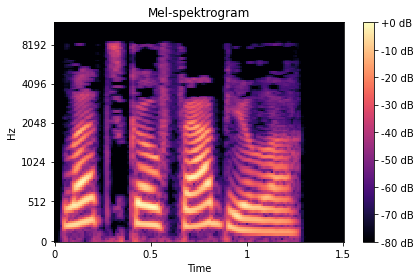

In [10]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

file = "sentence.wav"

y, sr = librosa.load(file, sr=48000)

librosa.feature.melspectrogram(y=y, sr=sr)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=12000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=12000)

plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spektrogram')
plt.tight_layout()
plt.savefig( mytext + ".png")

In [11]:
videos = []
videos.extend(glob.glob('*.mp4'))


In [12]:
videocount = 0
for video in videos:
    videocount += 1
    vidcap = cv.VideoCapture(video)
    vidcap.set(cv.CAP_PROP_POS_MSEC,5000)      # just cue to 20 sec. position
    success,image = vidcap.read()
    if success:
        cv.imwrite(str(videocount) + '.jpg', image)     # save frame as JPEG file
    
    pass
    

In [13]:
types = ('*.jpeg', '*.jpg','*.png') # the tuple of file types
images = []
for files in types:
    images.extend(glob.glob(files))

In [14]:
frame_width = 1500
images_per_row = 4
padding = 4

             

img_width, img_height = 500,500
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

new_im.save("collage.jpg",optimize=True, progressive=True)

0 0
376 0
752 0
1128 0
0 372
376 372
752 372
1128 372
0 744
376 744
752 744
1128 744
0 1116
376 1116
752 1116
1128 1116
0 1488
376 1488
752 1488
1128 1488
0 1860
376 1860
752 1860
1128 1860
0 2232
376 2232
752 2232


In [15]:
def Histogram_Computation(Image):

    Image_Height = Image.shape[0]
    Image_Width = Image.shape[1]

    Histogram = np.zeros([256], np.int32)

    for x in range(0, Image_Height):
        for y in range(0, Image_Width):
            Histogram[Image[x,y]] +=1

    return Histogram



In [16]:
Input_Image = cv.imread("collage.jpg",0) 

Histogram = Histogram_Computation(Input_Image)

In [17]:
for i in range(0, Histogram.shape[0]):

    print( Histogram)

Plot_Histogram(Histogram)

[904266  16911   9671   4686   7561   3651   3566   4515   4185   3722
   3711  34608  10244   5664   4711   4165   5662   4444   4817   4994
   5377   5712   5940   6052   6657   7626   7817   7868   8059   7544
   6219   7262   6543   5441   5198   4653   5084   4844   4120   3729
   3685   3689   3617   3089   2943   3489   3344   3194   2786   3060
   3044   3347   2905   2909   2939   3478   3279   3455   3910  23331
   4469   4558   5028  31175   4957   3929   5082   4009   4438   5652
   5279   5274   6587  40198   6255   5255   5103   4642   5181   4779
   4843   5531   6056   6033   5067   5264   5276   5753   5643   5304
   5947   6376   7682  53213  23716   6017   5406   4398   3917   3800
   3769   3565   3677   3635   3797   4029   3852   3839   3970   3944
   4248   4070   4058   4596   4202   4551   4704   4862   5435   8060
   6153  32885   5772   5603   5504   5556   6056   6164   8095  36822
  10661   7182   6226  66712   6175   5427   4982   5188   4939   5013
   484

   4201   6005  13193 249620  19769 990839]
[904266  16911   9671   4686   7561   3651   3566   4515   4185   3722
   3711  34608  10244   5664   4711   4165   5662   4444   4817   4994
   5377   5712   5940   6052   6657   7626   7817   7868   8059   7544
   6219   7262   6543   5441   5198   4653   5084   4844   4120   3729
   3685   3689   3617   3089   2943   3489   3344   3194   2786   3060
   3044   3347   2905   2909   2939   3478   3279   3455   3910  23331
   4469   4558   5028  31175   4957   3929   5082   4009   4438   5652
   5279   5274   6587  40198   6255   5255   5103   4642   5181   4779
   4843   5531   6056   6033   5067   5264   5276   5753   5643   5304
   5947   6376   7682  53213  23716   6017   5406   4398   3917   3800
   3769   3565   3677   3635   3797   4029   3852   3839   3970   3944
   4248   4070   4058   4596   4202   4551   4704   4862   5435   8060
   6153  32885   5772   5603   5504   5556   6056   6164   8095  36822
  10661   7182   6226  66712   61

NameError: name 'Plot_Histogram' is not defined

In [18]:
histlist = Histogram.tolist()


In [19]:
numerical = list(range(256))

In [20]:
import pandas as pd
import random
import numpy as np
import cv2 as cv
import glob
from math import ceil, floor
from matplotlib import pyplot as plt
import os




In [21]:
lst1 = list(range(100))
lst2 =list(np.random.randint(low = 1,high=3000,size=100))
df = pd.DataFrame(
    {'No': lst1,
     'Bw': lst2,
    })

In [22]:
df.to_csv('histogram.csv',index=False)

In [23]:
histogram= df.to_dict('r')

/var/folders/my/2knl0d_s69qc9q9brv1fgqkm0000gn/T/ipykernel_42090/4106478799.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  histogram= df.to_dict('r')


In [24]:
histogram

[{'No': 0, 'Bw': 387},
 {'No': 1, 'Bw': 2141},
 {'No': 2, 'Bw': 2740},
 {'No': 3, 'Bw': 2407},
 {'No': 4, 'Bw': 1111},
 {'No': 5, 'Bw': 1863},
 {'No': 6, 'Bw': 1325},
 {'No': 7, 'Bw': 1580},
 {'No': 8, 'Bw': 1613},
 {'No': 9, 'Bw': 1548},
 {'No': 10, 'Bw': 664},
 {'No': 11, 'Bw': 873},
 {'No': 12, 'Bw': 441},
 {'No': 13, 'Bw': 689},
 {'No': 14, 'Bw': 2839},
 {'No': 15, 'Bw': 426},
 {'No': 16, 'Bw': 2151},
 {'No': 17, 'Bw': 724},
 {'No': 18, 'Bw': 466},
 {'No': 19, 'Bw': 2601},
 {'No': 20, 'Bw': 1325},
 {'No': 21, 'Bw': 520},
 {'No': 22, 'Bw': 2764},
 {'No': 23, 'Bw': 2935},
 {'No': 24, 'Bw': 169},
 {'No': 25, 'Bw': 2726},
 {'No': 26, 'Bw': 665},
 {'No': 27, 'Bw': 1431},
 {'No': 28, 'Bw': 2044},
 {'No': 29, 'Bw': 837},
 {'No': 30, 'Bw': 1176},
 {'No': 31, 'Bw': 926},
 {'No': 32, 'Bw': 768},
 {'No': 33, 'Bw': 284},
 {'No': 34, 'Bw': 1986},
 {'No': 35, 'Bw': 1483},
 {'No': 36, 'Bw': 560},
 {'No': 37, 'Bw': 231},
 {'No': 38, 'Bw': 1259},
 {'No': 39, 'Bw': 1237},
 {'No': 40, 'Bw': 184},
 {'

In [25]:
from miditime.miditime import MIDITime
mymidi = MIDITime(300, 'collage.mid', 70, 3, 3)

In [26]:
my_data_timed_b = [{'beat': mymidi.beat(d['No']), 'freq': d['Bw']} for d in histogram]

In [27]:
start_timeb = my_data_timed_b[0]['beat']

In [28]:
def mag_to_pitch_tunedb(freq):
    scale_pctb = mymidi.linear_scale_pct(min([x['Bw'] for x in histogram]), 3000, freq)


    c_major = ["C", "C#", "Db", "D", "D#", "Eb", "E", "F", "F#", "Gb", "G", "G#", "Ab", "A", "A#", "Bb", "B"]


    noteb = mymidi.scale_to_note_classic(scale_pctb, c_major)



    midi_pitchb = mymidi.note_to_midi_pitch(noteb)

    
    return midi_pitchb



In [29]:
note_listb = []

for d in my_data_timed_b:
    note_listb.append([
        d['beat'] - start_timeb,
        mag_to_pitch_tunedb(d['freq']),
        100,  # velocity
        1  # duration, in beats
    ])


D3
C#5
Ab5
E5
B3
A4
D4
F#4
Gb4
F4
F#3
Ab3
D#3
Gb3
A#5
D#3
C#5
Gb3
Eb3
Gb5
D4
E3
Ab5
Bb5
C3
Ab5
F#3
Eb4
B4
Ab3
C#4
A3
G3
Db3
Bb4
E4
F3
C#3
Db4
Db4
C3
D#3
Eb4
G4
Db4
Eb5
D3
F3
B5
G4
C3
G3
D5
D#5
C4
D#4
Gb3
Db4
Gb3
B5
Eb3
E3
C#4
B5
C#3
Ab3
Bb4
F#3
A#4
Db5
Ab3
A4
E5
Gb5
C4
E5
F#4
C4
C3
D4
G3
Ab4
F5
Db5
G4
C4
C#3
Db4
C4
B4
Gb4
A4
Bb3
D#5
B3
D#4
E5
G#4
F#5
Bb5


In [30]:
# Add a track with those notes
mymidi.add_track(note_listb)
# Output the .mid file
mymidi.save_midi()

38 0.0 1 100
61 0.96 1 100
68 1.92 1 100
64 2.87 1 100
47 3.83 1 100
57 4.79 1 100
50 5.75 1 100
54 6.71 1 100
54 7.67 1 100
53 8.62 1 100
42 9.58 1 100
44 10.54 1 100
39 11.5 1 100
42 12.46 1 100
70 13.42 1 100
39 14.37 1 100
61 15.33 1 100
42 16.29 1 100
39 17.25 1 100
66 18.21 1 100
50 19.16 1 100
40 20.12 1 100
68 21.08 1 100
70 22.04 1 100
36 23.0 1 100
68 23.96 1 100
42 24.91 1 100
51 25.87 1 100
59 26.83 1 100
44 27.79 1 100
49 28.75 1 100
45 29.71 1 100
43 30.66 1 100
37 31.62 1 100
58 32.58 1 100
52 33.54 1 100
41 34.5 1 100
37 35.46 1 100
49 36.41 1 100
49 37.37 1 100
36 38.33 1 100
39 39.29 1 100
51 40.25 1 100
55 41.2 1 100
49 42.16 1 100
63 43.12 1 100
38 44.08 1 100
41 45.04 1 100
71 46.0 1 100
55 46.95 1 100
36 47.91 1 100
43 48.87 1 100
62 49.83 1 100
63 50.79 1 100
48 51.75 1 100
51 52.7 1 100
42 53.66 1 100
49 54.62 1 100
42 55.58 1 100
71 56.54 1 100
39 57.49 1 100
40 58.45 1 100
49 59.41 1 100
71 60.37 1 100
37 61.33 1 100
44 62.29 1 100
58 63.24 1 100
42 64.2 1 100

In [31]:
from pydub import AudioSegment
from pydub.generators import Sine
from collections import defaultdict
from mido import MidiFile

In [32]:
def note_to_freq(note, concert_A=440.0):
    
    return (2.0 ** ((note - 69) / 12.0)) * concert_A

mid = MidiFile("collage.mid")
output = AudioSegment.silent(mid.length * 2000.0)

tempo = 150 # bpm
output = output.low_pass_filter(1000)

def ticks_to_ms(ticks):
    tick_ms = (60000.0 / tempo) / mid.ticks_per_beat
    return ticks * tick_ms
  

for track in mid.tracks:
  
    current_pos = 0.0

    current_notes = defaultdict(dict)

    for msg in track:
        current_pos += ticks_to_ms(msg.time)

        if msg.type == 'note_on':
            current_notes[msg.channel][msg.note] = (current_pos, msg)

        if msg.type == 'note_off':
            start_pos, start_msg = current_notes[msg.channel].pop(msg.note)

            duration = current_pos - start_pos

            signal_generator = Sine(note_to_freq(msg.note))
            rendered = signal_generator.to_audio_segment(duration=duration, volume=-20).fade_out(300).fade_in(30)

            output = output.overlay(rendered, start_pos)

output.export("generatedmemory.wav", format="wav")

<_io.BufferedRandom name='generatedmemory.wav'>

In [33]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import os
from mobilechelonian import Turtle

In [34]:
name ='generatedmemory'
file = name+".wav"
title =name+".ps"
png = name + '.png'
frame_count=0


In [35]:
signal, sample_rate = librosa.load(file)

In [36]:
FRAME_SIZE = 2028
HOP_LENGTH = 250000


In [37]:
rms = librosa.feature.rms(signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
frames = range(len(rms))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

/var/folders/my/2knl0d_s69qc9q9brv1fgqkm0000gn/T/ipykernel_42090/1185751252.py:1: FutureWarning: Pass y=[-1.1924028e-07  3.1062078e-07 -9.3728988e-07 ...  1.2828391e-04
  6.3941319e-05 -3.2183780e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms = librosa.feature.rms(signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [38]:
spec = []
for i in rms:
    spec.append(i*120)

In [39]:
len(rms)

4

In [40]:
import turtle
import time
from turtle import Screen, Turtle
from random import randint
import random
import PIL.Image
from tkinter import *
import itertools
import io

In [41]:
# audio/visual animation & final output of sound to image
current_directory = os.getcwd()
image_path = os.path.join(current_directory, r'new_folder')
if not os.path.exists(image_path):
    os.makedirs(image_path)
    
window = turtle.Screen()
window.title(str(name))
window.setup(width = 650, height = 650)
cv = turtle.getcanvas()

turtle.hideturtle()
turtle.speed(0)
turtle.width(2)
turtle.bgcolor('white')
time.sleep(5)
warna = ['#f9a931','#2568b6','#fb4a16','#026768','#c4a4cd','#3c3f45'
         ]

bgc = ['#43bcd9', '#fec009','#fc8a17','#9a9b9f','#506d5b','#e1907f','#dbcec5','#f2bdcd']
w= random.choice(bgc)
turtle.penup()
turtle.pencolor(w)
turtle.width(3)
turtle.goto(-325,325)
turtle.pendown()
turtle.fillcolor(w)
turtle.begin_fill()
turtle.goto(0,325)
turtle.goto(0,0)
turtle.goto(-325,0)
turtle.goto(-325,325)
turtle.end_fill()
turtle.penup()



w= random.choice(bgc)
turtle.penup()
turtle.pencolor(w)
turtle.width(3)
turtle.goto(0,325)
turtle.pendown()
turtle.fillcolor(w)
turtle.begin_fill()
turtle.goto(325,325)
turtle.goto(325,0)
turtle.goto(0,0)
turtle.goto(0,325)
turtle.end_fill()
turtle.penup()


turtle.penup()
turtle.pencolor(w)
turtle.width(3)
turtle.setheading(0)
turtle.goto(-325,0)
turtle.pendown()
turtle.fillcolor(w)
turtle.begin_fill()
turtle.goto(0,0)
turtle.goto(0,-325)
turtle.goto(-325,-325)
turtle.goto(-325,0)
turtle.end_fill()
turtle.penup()



w= random.choice(bgc)
turtle.penup()
turtle.pencolor(w)
turtle.width(3)
turtle.setheading(0)
turtle.goto(0,0)
turtle.pendown()
turtle.fillcolor(w)
turtle.begin_fill()
turtle.goto(325,0)
turtle.goto(325,-325)
turtle.goto(0,-325)
turtle.goto(0,0)
turtle.end_fill()
turtle.penup()





density= [0,2,5]

sudut = [0,90,180,360]
for s in spec:
    for i in range(0,1):
        d= random.choice(density)
        w= random.choice(warna)
        turtle.pencolor(w)
        turtle.goto(randint(-320,320),randint(-320,320))
        turtle.width(d)
        turtle.setheading(random.choice(sudut))
        turtle.pendown()
        turtle.circle(s*6.5,180)
        turtle.penup()
  

    
 
    turtle.pencolor('black')
    turtle.goto(randint(-300,300),randint(-300,300))
    turtle.width(2)
    turtle.fillcolor('black')
    turtle.begin_fill()
    turtle.pendown()
    turtle.circle(s*5)
    turtle.end_fill()
    turtle.penup()
    turtle.goto(turtle.position()[0]-5, turtle.position()[1]-1)
    w = random.choice(warna)
    turtle.pencolor(w)
    turtle.fillcolor(w)
    turtle.begin_fill()
    turtle.pendown()
    turtle.circle(s*5)
    turtle.end_fill()
    turtle.penup()
    
    
    turtle.pencolor('black')
    turtle.goto(randint(-300,300),randint(-300,300))
    turtle.width(2)
    turtle.fillcolor('black')
    turtle.begin_fill()
    turtle.pendown()
    turtle.circle(s*7.5)
    turtle.end_fill()
    turtle.penup()
    turtle.goto(turtle.position()[0]-5, turtle.position()[1]-1)
    w = random.choice(warna)
    turtle.pencolor(w)
    turtle.fillcolor(w)
    turtle.begin_fill()
    turtle.pendown()
    turtle.circle(s*7.5)
    turtle.end_fill()
    turtle.penup()
    



    
    d=random.choice(density)
    turtle.width(d)
    for i in range(0,6):
        turtle.goto(randint(-320,320),randint(-320,320))
        turtle.pendown()
        turtle.fillcolor(w)
        turtle.begin_fill()
        turtle.forward(i*20)
        turtle.right(90)
        turtle.end_fill()
        turtle.penup()

turtle.penup()
turtle.goto(5,-300)
turtle.pendown()
turtle.pencolor('black')
turtle.pendown()
turtle.write(mytext ,move=False,align="center", font=("Arial", 20)) # monalisa can be passed to text input



        


       




        

cv.postscript(file=title, colormode='color')

img = PIL.Image.open(title)
img.load(scale=10)    
img.save(png,'png')  #final result from sound to image


turtle.done()
print('is done')




is done
